In [62]:
import pandas as pd

# Importing the dataset
df1 = pd.read_excel('Test.xlsx', sheet_name='Week1')
df2 = pd.read_excel('Test.xlsx', sheet_name='Week2')


In [63]:
# Exploration of the dataset

# For df1
print('Exploration of the dataset of Week 1')
print(df1.head())
print(df1.info())
print(df1.describe())

print('////////////////////////////////////////////////////////////////////////////')

# For df2
print('Exploration of the dataset of Week 2')
print(df2.head())
print(df2.info())
print(df2.describe())

Exploration of the dataset of Week 1
  Applications for Screen Time Screen Time of Applications  \
0            Total Screen Time                     32h 38m   
1    Difference From Last Week                    09:50:24   
2        Daily Avg Screen Time                      4h 39m   
3                          NaN                         NaN   
4                     WhatsApp                      5h 02m   

   Applications for Wake Ups  Wake Up Counts of Applications  \
0             Total Wake Ups                         1961.00   
1  Difference From Last Week                            1.47   
2         Daily Avg Wake Ups                          280.00   
3                        NaN                             NaN   
4                   WhatsApp                         1046.00   

  Applications for Notifications  Notification Count for Applicaitons  \
0        Daily Avg Notifications                                421.0   
1                            NaN                           

In [64]:
# Removing empty values

df1_cleaned = df1.dropna()
df2_cleaned = df2.dropna()

print(df1_cleaned)
print(df2_cleaned)

  Applications for Screen Time Screen Time of Applications  \
0            Total Screen Time                     32h 38m   
2        Daily Avg Screen Time                      4h 39m   
4                     WhatsApp                      5h 02m   
5                    Instagram                     11h 39m   
6                            X                      3h 15m   
7                       Safari                         59m   
8                        Phone                         45m   

  Applications for Wake Ups  Wake Up Counts of Applications  \
0            Total Wake Ups                          1961.0   
2        Daily Avg Wake Ups                           280.0   
4                  WhatsApp                          1046.0   
5                     Phone                           141.0   
6                         X                            77.0   
7                 Instagram                            52.0   
8                   Life360                            30.0   

In [65]:
# Converting time values all to minutes

def convert_to_minutes(time_str):
    if pd.isna(time_str):  # Check if the value is NaN
        return None

    parts = time_str.split('h')

    if len(parts) == 1:  # If there's no 'h', consider it as only minutes
        minutes = int(parts[0].replace('m', '').strip())
        total_minutes = minutes
    else:
        hours = int(parts[0].strip())
        minutes = int(parts[1].replace('m', '').strip())
        total_minutes = hours * 60 + minutes

    return total_minutes

# Create a copy of the DataFrames to avoid SettingWithCopyWarning
df1_cleaned = df1_cleaned.copy()
df2_cleaned = df2_cleaned.copy()

# Apply the conversion function to the specified columns
df1_cleaned['Screen Time of Applications (Minutes)'] = df1_cleaned['Screen Time of Applications'].apply(convert_to_minutes)
df2_cleaned['Screen Time of Applications (Minutes)'] = df2_cleaned['Screen Time of Applications'].apply(convert_to_minutes)

df1_cleaned['Screen Time of Type of Applications (Minutes)'] = df1_cleaned['Screen Time of Type of Applications'].apply(convert_to_minutes)
df2_cleaned['Screen Time of Type of Applications (Minutes)'] = df2_cleaned['Screen Time of Type of Applications'].apply(convert_to_minutes)

# Display the updated DataFrames
print(df1_cleaned)
print(df2_cleaned)

  Applications for Screen Time Screen Time of Applications  \
0            Total Screen Time                     32h 38m   
2        Daily Avg Screen Time                      4h 39m   
4                     WhatsApp                      5h 02m   
5                    Instagram                     11h 39m   
6                            X                      3h 15m   
7                       Safari                         59m   
8                        Phone                         45m   

  Applications for Wake Ups  Wake Up Counts of Applications  \
0            Total Wake Ups                          1961.0   
2        Daily Avg Wake Ups                           280.0   
4                  WhatsApp                          1046.0   
5                     Phone                           141.0   
6                         X                            77.0   
7                 Instagram                            52.0   
8                   Life360                            30.0   

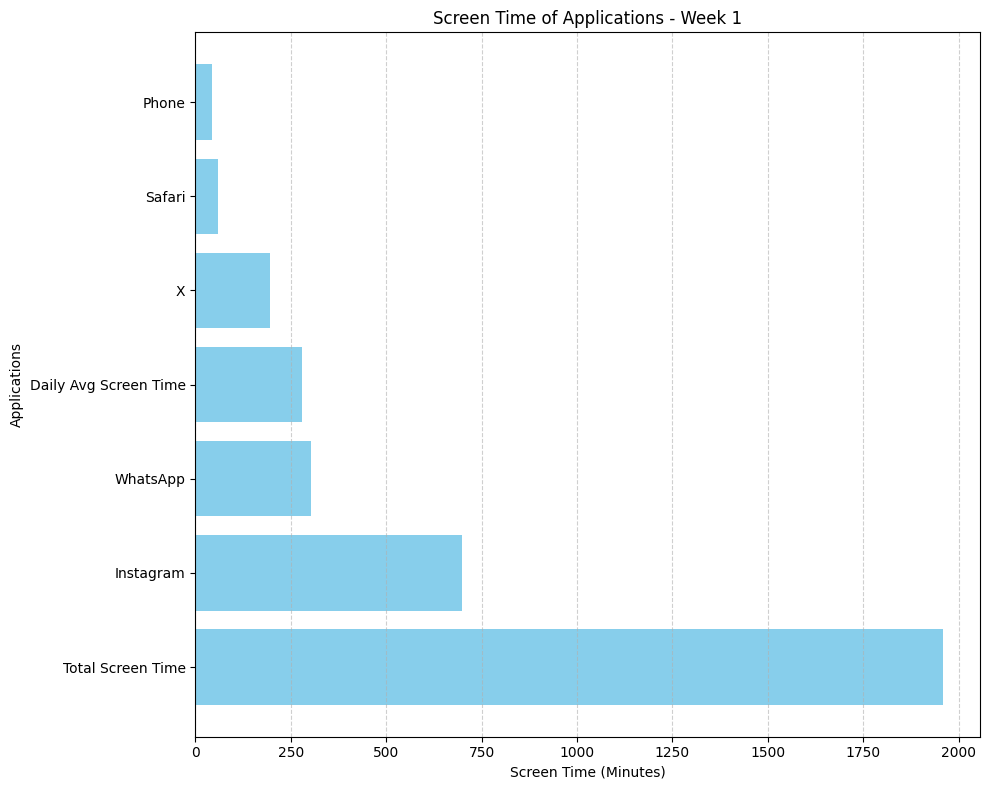

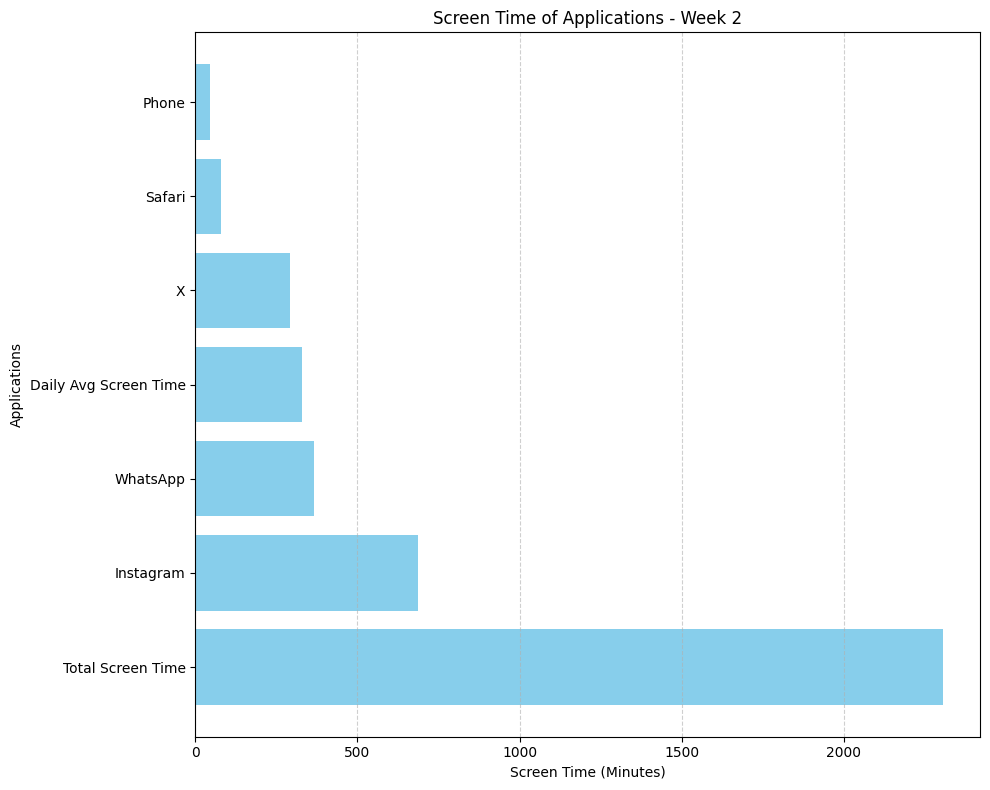

In [66]:
import matplotlib.pyplot as plt

# Visualization of Screen Times

# Select the relevant columns for visualization
applications_week1 = df1_cleaned[['Applications for Screen Time', 'Screen Time of Applications (Minutes)']]

# Sort the DataFrame by screen time in descending order for better visualization
applications_week1 = applications_week1.sort_values(by='Screen Time of Applications (Minutes)', ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(applications_week1['Applications for Screen Time'], applications_week1['Screen Time of Applications (Minutes)'], color='skyblue')
plt.xlabel('Screen Time (Minutes)')
plt.ylabel('Applications')
plt.title('Screen Time of Applications - Week 1')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



# Select the relevant columns for visualization
applications_week2 = df2_cleaned[['Applications for Screen Time', 'Screen Time of Applications (Minutes)']]

# Sort the DataFrame by screen time in descending order for better visualization
applications_week2 = applications_week2.sort_values(by='Screen Time of Applications (Minutes)', ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(applications_week2['Applications for Screen Time'], applications_week2['Screen Time of Applications (Minutes)'], color='skyblue')
plt.xlabel('Screen Time (Minutes)')
plt.ylabel('Applications')
plt.title('Screen Time of Applications - Week 2')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



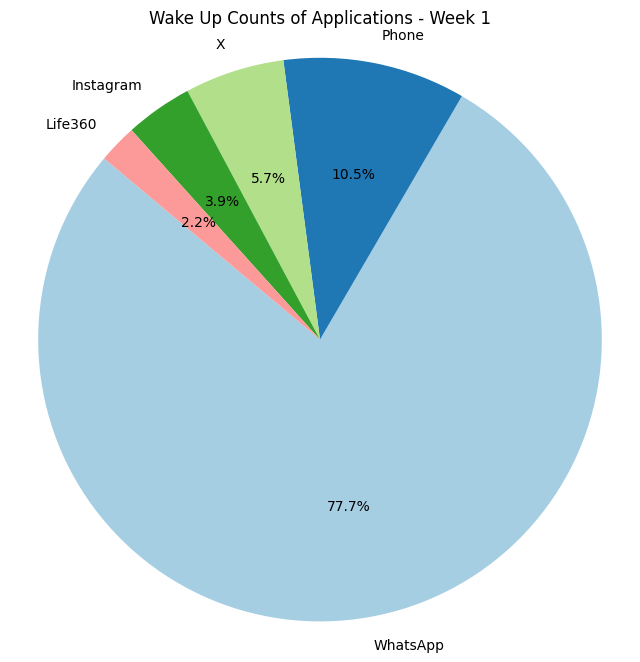

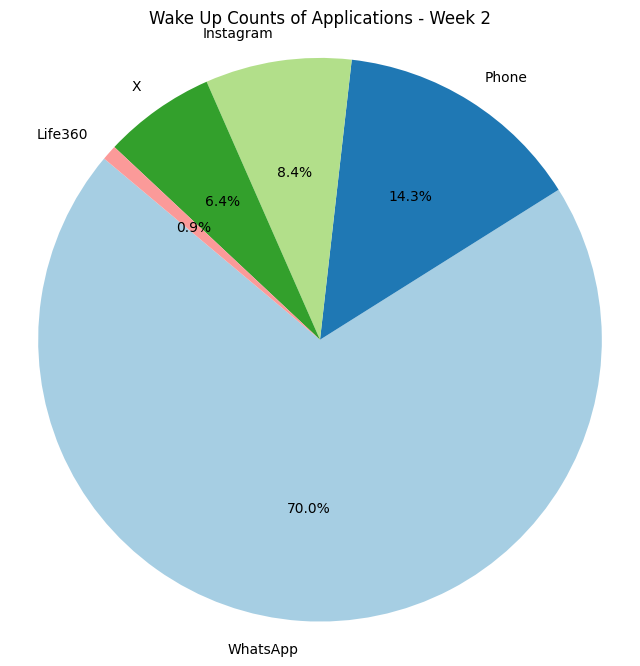

In [67]:
# Visualization of Wake up Counts

# Select the relevant columns for visualization
wake_up_counts_week1 = df1_cleaned[['Applications for Wake Ups', 'Wake Up Counts of Applications']]

# Remove 'Total Wake Ups' and 'Daily Avg Wake Ups'
wake_up_counts_week1 = wake_up_counts_week1[~wake_up_counts_week1['Applications for Wake Ups'].isin(['Total Wake Ups', 'Daily Avg Wake Ups'])]

# Sort the DataFrame by wake-up counts in descending order for better visualization
wake_up_counts_week1 = wake_up_counts_week1.sort_values(by='Wake Up Counts of Applications', ascending=False)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(wake_up_counts_week1['Wake Up Counts of Applications'], labels=wake_up_counts_week1['Applications for Wake Ups'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Wake Up Counts of Applications - Week 1')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


# Select the relevant columns for visualization
wake_up_counts_week2 = df2_cleaned[['Applications for Wake Ups', 'Wake Up Counts of Applications']]

# Remove 'Total Wake Ups' and 'Daily Avg Wake Ups'
wake_up_counts_week2 = wake_up_counts_week2[~wake_up_counts_week2['Applications for Wake Ups'].isin(['Total Wake Ups', 'Daily Avg Wake Ups'])]

# Sort the DataFrame by wake-up counts in descending order for better visualization
wake_up_counts_week2 = wake_up_counts_week2.sort_values(by='Wake Up Counts of Applications', ascending=False)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(wake_up_counts_week2['Wake Up Counts of Applications'], labels=wake_up_counts_week2['Applications for Wake Ups'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Wake Up Counts of Applications - Week 2')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

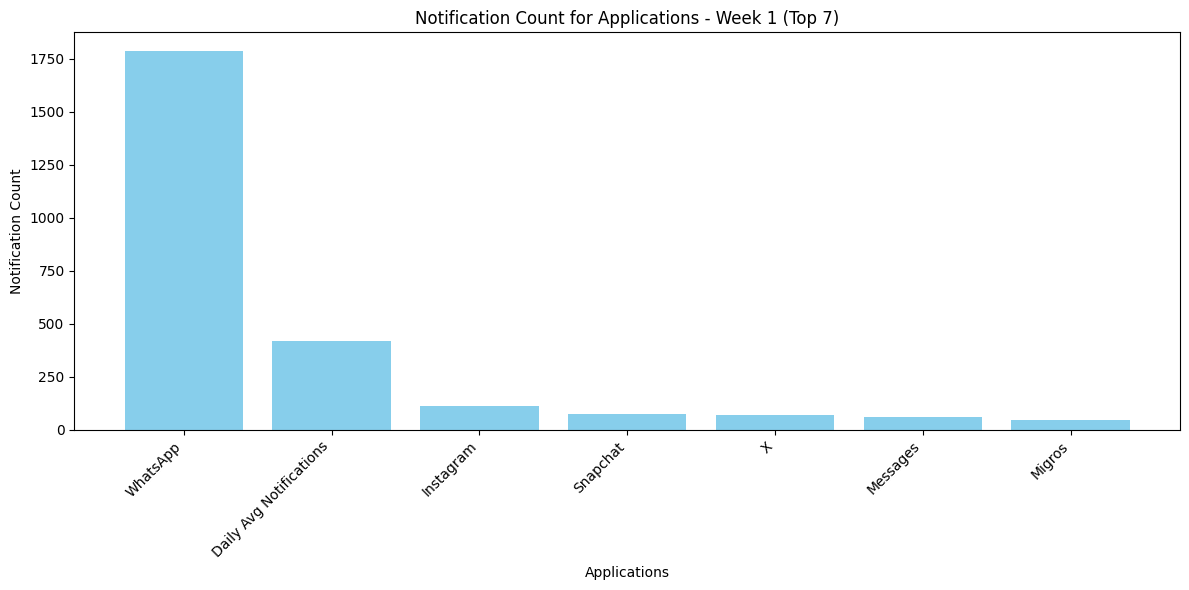

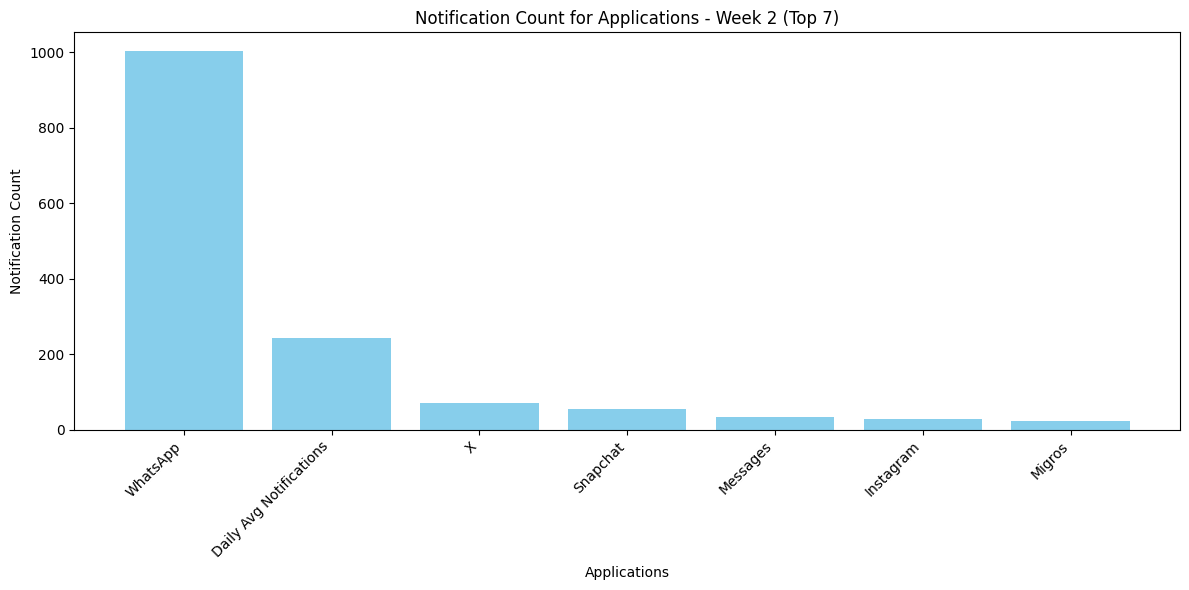

In [68]:
# Visualization of notification count

# Select the relevant columns for visualization
notification_counts_week1 = df1_cleaned[['Applications for Notifications', 'Notification Count for Applicaitons']]

# Remove NaN values
notification_counts_week1 = notification_counts_week1.dropna()

# Sort the DataFrame by notification counts in descending order for better visualization
notification_counts_week1 = notification_counts_week1.sort_values(by='Notification Count for Applicaitons', ascending=False)

# Take only the first 7 applications
top_7_notification_counts_week1 = notification_counts_week1.head(7)

# Plot a column chart
plt.figure(figsize=(12, 6))
plt.bar(top_7_notification_counts_week1['Applications for Notifications'], top_7_notification_counts_week1['Notification Count for Applicaitons'], color='skyblue')
plt.xlabel('Applications')
plt.ylabel('Notification Count')
plt.title('Notification Count for Applications - Week 1 (Top 7)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


# Select the relevant columns for visualization
notification_counts_week2 = df2_cleaned[['Applications for Notifications', 'Notification Count for Applicaitons']]

# Remove NaN values
notification_counts_week2 = notification_counts_week2.dropna()

# Sort the DataFrame by notification counts in descending order for better visualization
notification_counts_week2 = notification_counts_week2.sort_values(by='Notification Count for Applicaitons', ascending=False)

# Take only the first 7 applications
top_7_notification_counts_week2 = notification_counts_week2.head(7)

# Plot a column chart
plt.figure(figsize=(12, 6))
plt.bar(top_7_notification_counts_week2['Applications for Notifications'], top_7_notification_counts_week2['Notification Count for Applicaitons'], color='skyblue')
plt.xlabel('Applications')
plt.ylabel('Notification Count')
plt.title('Notification Count for Applications - Week 2 (Top 7)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()




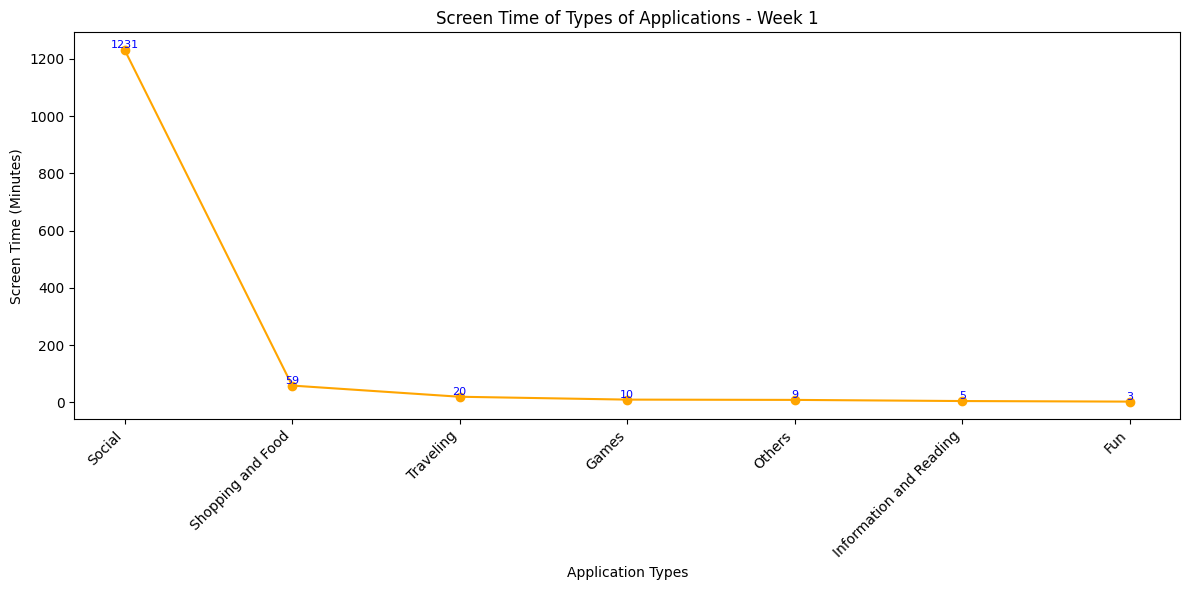

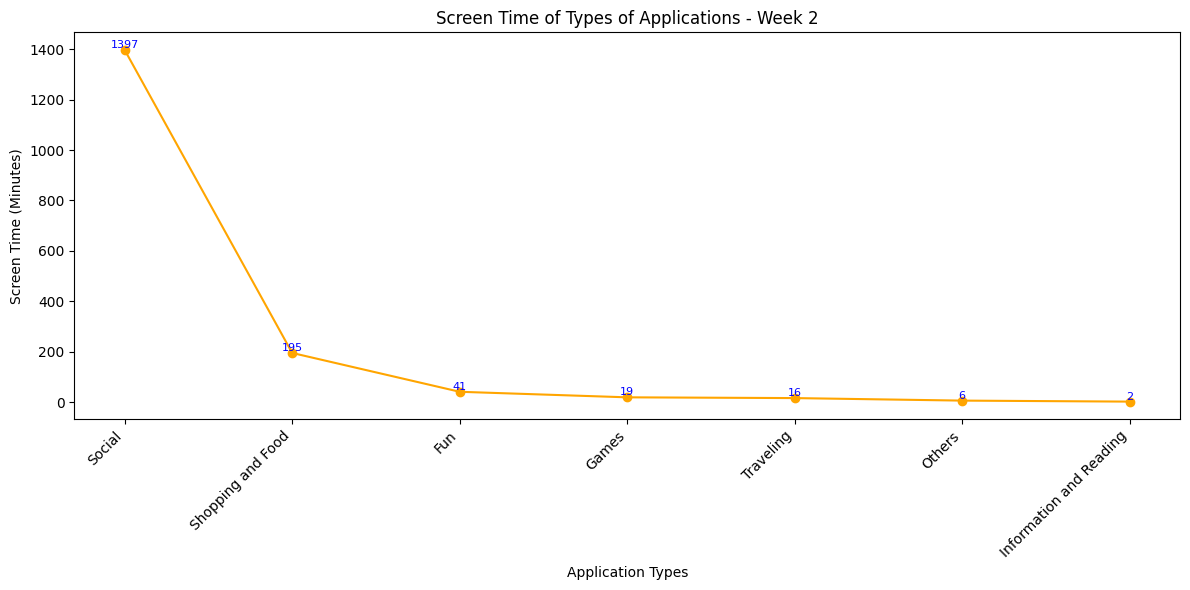

In [69]:
# Visualization of Screen time of different types of groups

# Select the relevant columns for visualization
screen_time_types_week1 = df1_cleaned[['Type of Applicaitons for Screen Time', 'Screen Time of Type of Applications (Minutes)']]

# Remove NaN values
screen_time_types_week1 = screen_time_types_week1.dropna()

# Sort the DataFrame by screen time in descending order for better visualization
screen_time_types_week1 = screen_time_types_week1.sort_values(by='Screen Time of Type of Applications (Minutes)', ascending=False)

# Plot a line chart
plt.figure(figsize=(12, 6))
plt.plot(screen_time_types_week1['Type of Applicaitons for Screen Time'], screen_time_types_week1['Screen Time of Type of Applications (Minutes)'], marker='o', linestyle='-', color='orange')
plt.xlabel('Application Types')
plt.ylabel('Screen Time (Minutes)')
plt.title('Screen Time of Types of Applications - Week 1')
for i, txt in enumerate(screen_time_types_week1['Screen Time of Type of Applications (Minutes)']):
    plt.text(i, txt, f'{txt:.0f}', ha='center', va='bottom', fontsize=8, color='blue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Select the relevant columns for visualization
screen_time_types_week2 = df2_cleaned[['Type of Applicaitons for Screen Time', 'Screen Time of Type of Applications (Minutes)']]

# Remove NaN values
screen_time_types_week2 = screen_time_types_week2.dropna()

# Sort the DataFrame by screen time in descending order for better visualization
screen_time_types_week2 = screen_time_types_week2.sort_values(by='Screen Time of Type of Applications (Minutes)', ascending=False)

# Plot a line chart
plt.figure(figsize=(12, 6))
plt.plot(screen_time_types_week2['Type of Applicaitons for Screen Time'], screen_time_types_week2['Screen Time of Type of Applications (Minutes)'], marker='o', linestyle='-', color='orange')
plt.xlabel('Application Types')
plt.ylabel('Screen Time (Minutes)')
plt.title('Screen Time of Types of Applications - Week 2')
for i, txt in enumerate(screen_time_types_week2['Screen Time of Type of Applications (Minutes)']):
    plt.text(i, txt, f'{txt:.0f}', ha='center', va='bottom', fontsize=8, color='blue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

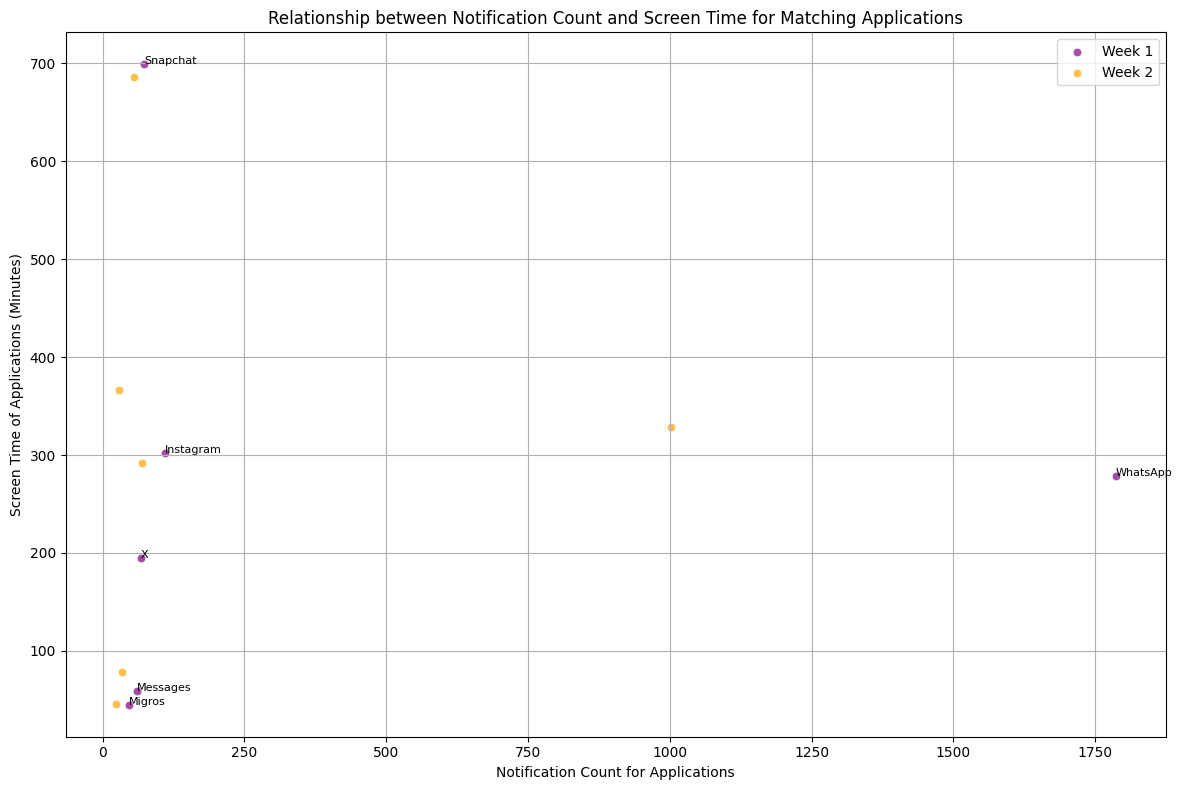

In [70]:
import seaborn as sns

# Affect of Notification Count of Applications to the Screen Time of Applications

# Select the relevant columns for visualization
notification_screen_time_week1 = df1_cleaned[['Applications for Notifications', 'Notification Count for Applicaitons', 'Screen Time of Applications (Minutes)']]
notification_screen_time_week2 = df2_cleaned[['Applications for Notifications', 'Notification Count for Applicaitons', 'Screen Time of Applications (Minutes)']]

# Remove 'Daily Avg Notifications'
notification_screen_time_week1 = notification_screen_time_week1[~notification_screen_time_week1['Applications for Notifications'].isin(['Daily Avg Notifications'])]
notification_screen_time_week2 = notification_screen_time_week2[~notification_screen_time_week2['Applications for Notifications'].isin(['Daily Avg Notifications'])]

# Merge the two DataFrames based on common application names
merged_df = pd.merge(notification_screen_time_week1, notification_screen_time_week2, on='Applications for Notifications', suffixes=('_week1', '_week2'), how='inner')

# Plot a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Notification Count for Applicaitons_week1', y='Screen Time of Applications (Minutes)_week1', data=merged_df, color='purple', alpha=0.7, label='Week 1')
sns.scatterplot(x='Notification Count for Applicaitons_week2', y='Screen Time of Applications (Minutes)_week2', data=merged_df, color='orange', alpha=0.7, label='Week 2')

# Label each dot with the corresponding application name
for i, row in merged_df.iterrows():
    plt.text(row['Notification Count for Applicaitons_week1'], row['Screen Time of Applications (Minutes)_week1'], row['Applications for Notifications'], fontsize=8)

plt.xlabel('Notification Count for Applications')
plt.ylabel('Screen Time of Applications (Minutes)')
plt.title('Relationship between Notification Count and Screen Time for Matching Applications')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-71-a67430dafec7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix1 = df1_cleaned.corr()


Correlation Matrix:
                                               Wake Up Counts of Applications  \
Wake Up Counts of Applications                                       1.000000   
Notification Count for Applicaitons                                  0.052164   
Screen Time of Applications (Minutes)                                0.855058   
Screen Time of Type of Applications (Minutes)                        0.878156   

                                               Notification Count for Applicaitons  \
Wake Up Counts of Applications                                            0.052164   
Notification Count for Applicaitons                                       1.000000   
Screen Time of Applications (Minutes)                                     0.049949   
Screen Time of Type of Applications (Minutes)                             0.078163   

                                               Screen Time of Applications (Minutes)  \
Wake Up Counts of Applications                         

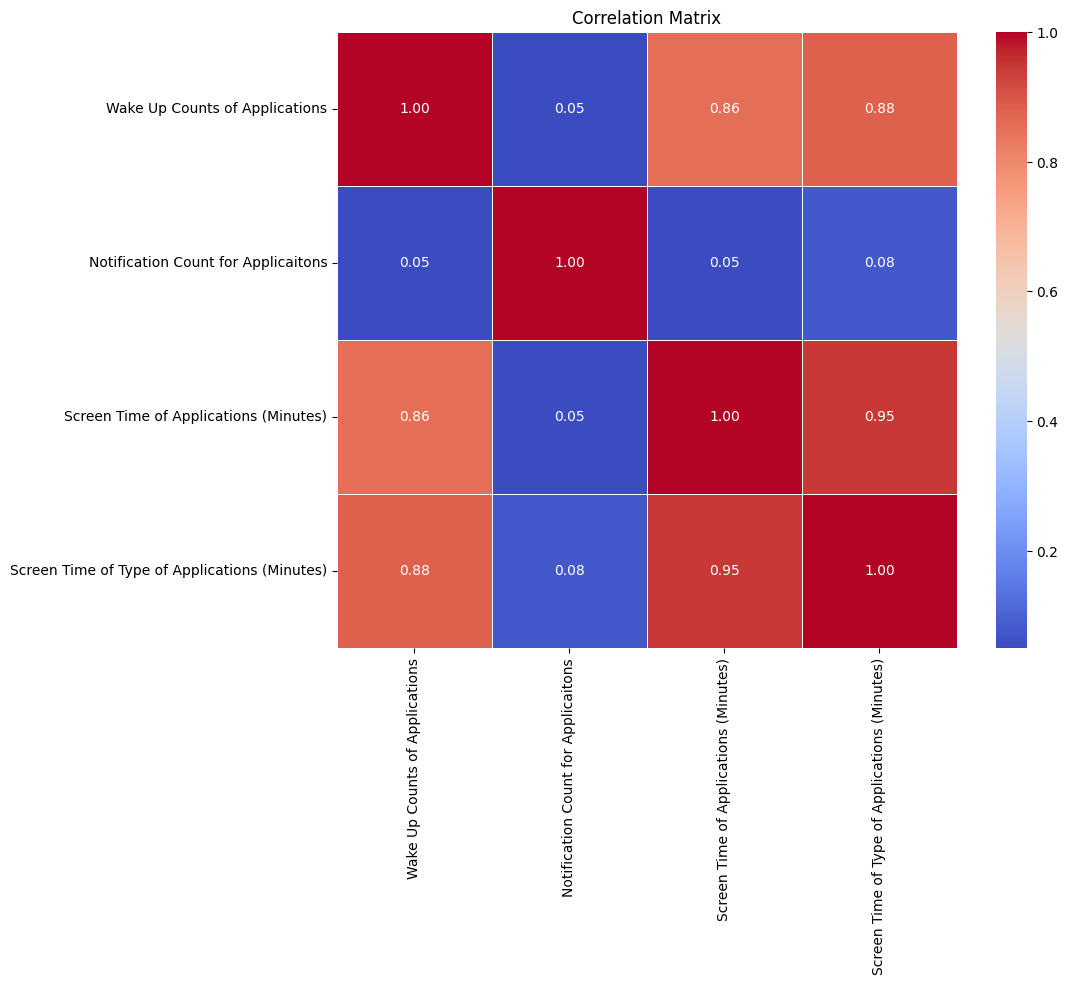

<ipython-input-71-a67430dafec7>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = df2_cleaned.corr()


Correlation Matrix:
                                               Wake Up Counts of Applications  \
Wake Up Counts of Applications                                       1.000000   
Notification Count for Applicaitons                                  0.070633   
Screen Time of Applications (Minutes)                                0.930066   
Screen Time of Type of Applications (Minutes)                        0.931920   

                                               Notification Count for Applicaitons  \
Wake Up Counts of Applications                                            0.070633   
Notification Count for Applicaitons                                       1.000000   
Screen Time of Applications (Minutes)                                     0.062929   
Screen Time of Type of Applications (Minutes)                             0.169447   

                                               Screen Time of Applications (Minutes)  \
Wake Up Counts of Applications                         

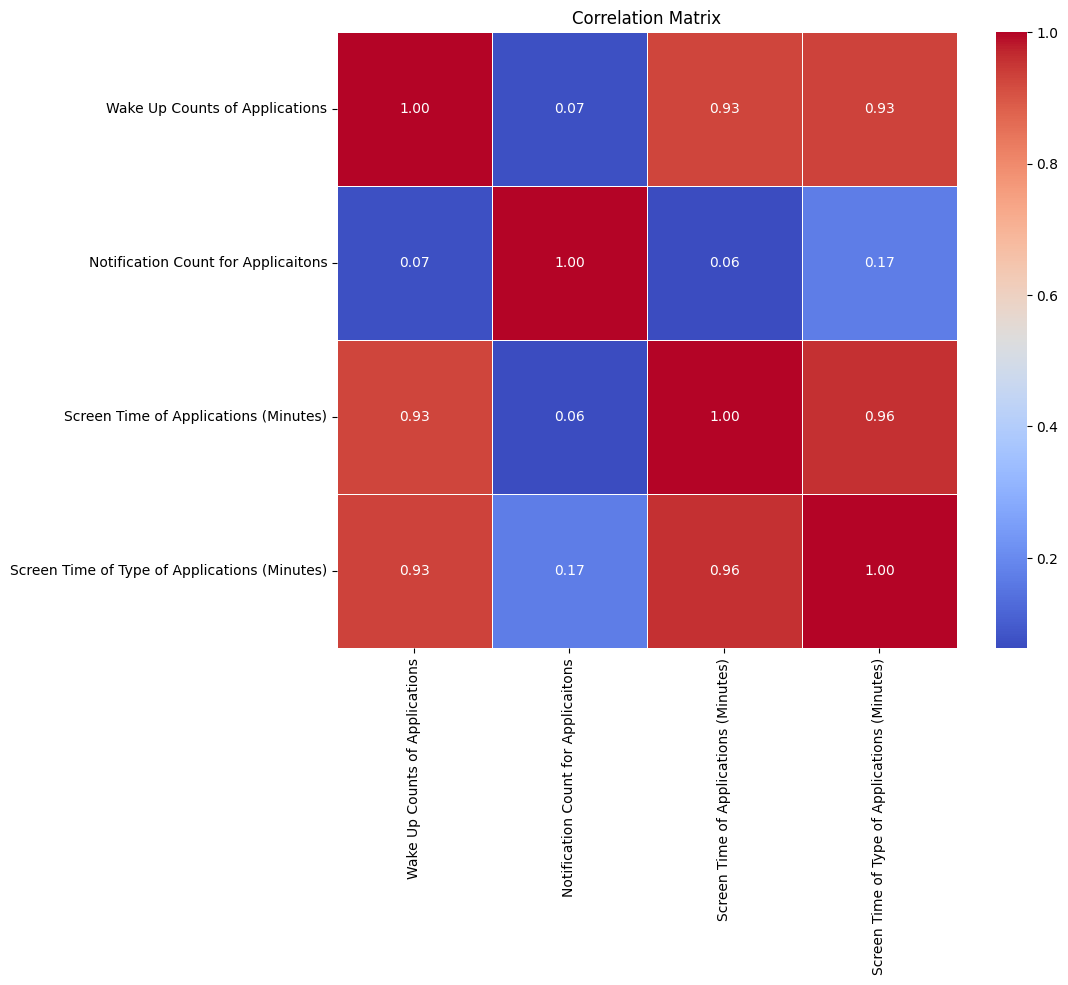

In [71]:
# Correlation Analysis

# Calculate the correlation matrix
correlation_matrix1 = df1_cleaned.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix1)

# Plot a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Calculate the correlation matrix
correlation_matrix2 = df2_cleaned.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix2)

# Plot a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



<ipython-input-72-fcab32cd5cb9>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_means = category_data.groupby('Applications for Screen Time').mean()


Category-wise Analysis:
                              Screen Time of Applications (Minutes)  \
Applications for Screen Time                                          
Instagram                                                     699.0   
Phone                                                          45.0   
Safari                                                         59.0   
WhatsApp                                                      302.0   
X                                                             195.0   

                              Notification Count for Applicaitons  
Applications for Screen Time                                       
Instagram                                                    73.0  
Phone                                                        46.0  
Safari                                                       61.0  
WhatsApp                                                    110.0  
X                                                            68.0  


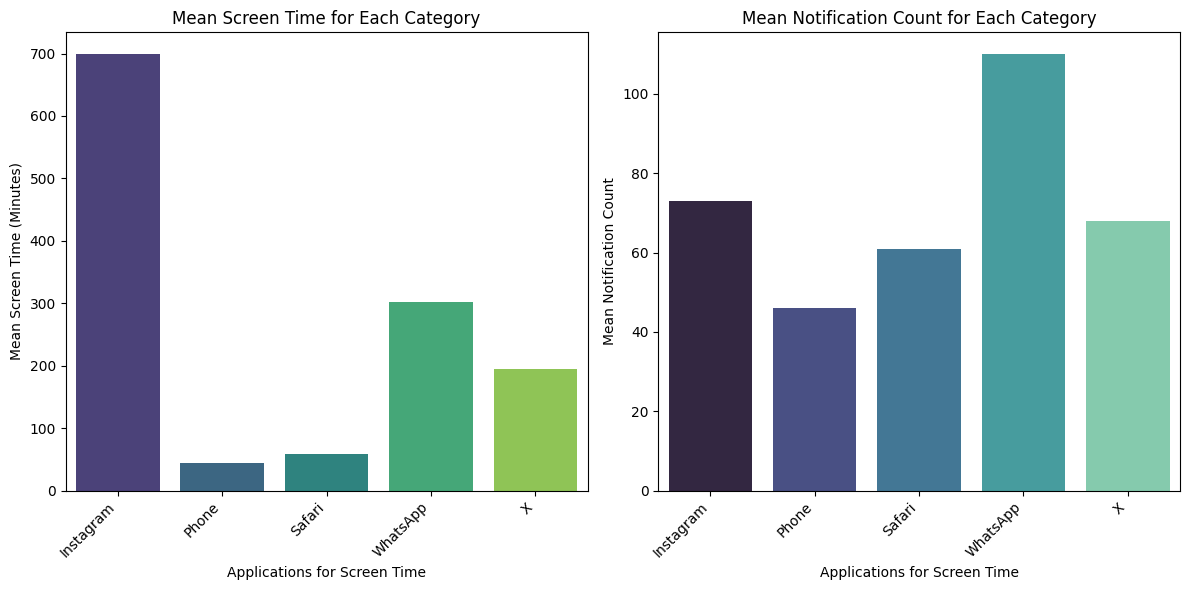

In [72]:
# Category-wise Analysis

# Remove 'Daily Avg Screen Time' and 'Total Screen Time'
category_data = df1_cleaned[~df1_cleaned['Applications for Screen Time'].isin(['Daily Avg Screen Time', 'Total Screen Time'])]

# Select relevant columns for category-wise analysis
category_data = category_data[['Applications for Screen Time', 'Screen Time of Applications (Minutes)', 'Applications for Notifications', 'Notification Count for Applicaitons']]

# Group by 'Applications for Screen Time' and calculate mean values for each category
category_means = category_data.groupby('Applications for Screen Time').mean()

# Display the category-wise analysis
print("Category-wise Analysis:")
print(category_means)

# Plot bar charts for Screen Time and Notification Count for each category
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=category_means.index, y=category_means['Screen Time of Applications (Minutes)'], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Applications for Screen Time')
plt.ylabel('Mean Screen Time (Minutes)')
plt.title('Mean Screen Time for Each Category')

plt.subplot(1, 2, 2)
sns.barplot(x=category_means.index, y=category_means['Notification Count for Applicaitons'], palette='mako')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Applications for Screen Time')
plt.ylabel('Mean Notification Count')
plt.title('Mean Notification Count for Each Category')

plt.tight_layout()
plt.show()

Category-wise Analysis:
                                      Screen Time of Type of Applications (Minutes)
Type of Applicaitons for Screen Time                                               
Fun                                                                             3.0
Games                                                                          10.0
Information and Reading                                                         5.0
Others                                                                          9.0
Traveling                                                                      20.0


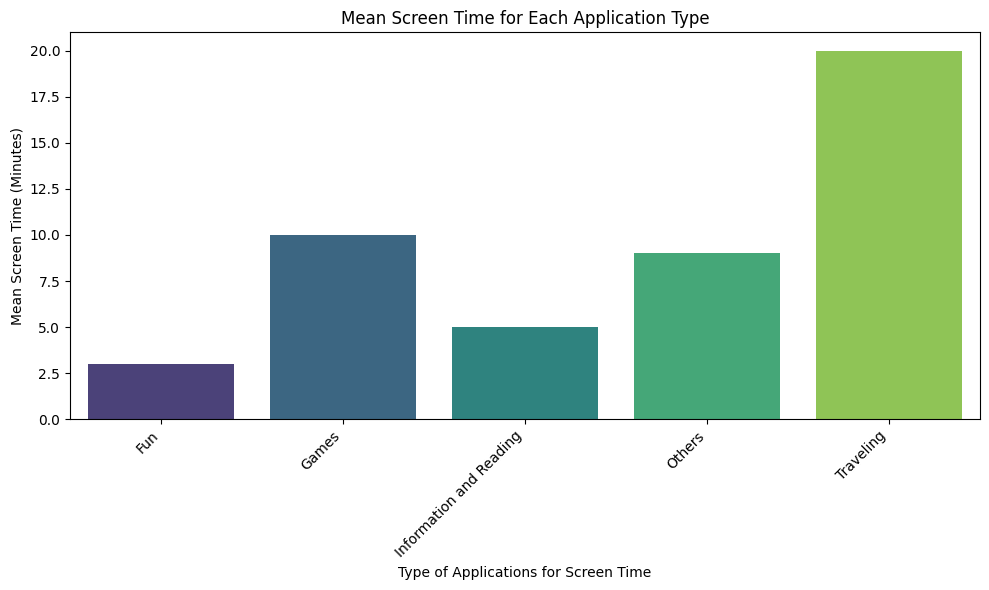

In [73]:
# Category-wise Analysis

# Remove 'Daily Avg Screen Time' and 'Total Screen Time'
category_data = df1_cleaned[~df1_cleaned['Applications for Screen Time'].isin(['Daily Avg Screen Time', 'Total Screen Time'])]

# Select relevant columns for category-wise analysis
category_data = category_data[['Type of Applicaitons for Screen Time', 'Screen Time of Type of Applications (Minutes)']]

# Group by 'Type of Applicaitons for Screen Time' and calculate mean values for each category
category_means = category_data.groupby('Type of Applicaitons for Screen Time').mean()

# Display the category-wise analysis
print("Category-wise Analysis:")
print(category_means)

# Plot bar chart for mean screen time for each category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_means.index, y=category_means['Screen Time of Type of Applications (Minutes)'], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Type of Applications for Screen Time')
plt.ylabel('Mean Screen Time (Minutes)')
plt.title('Mean Screen Time for Each Application Type')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


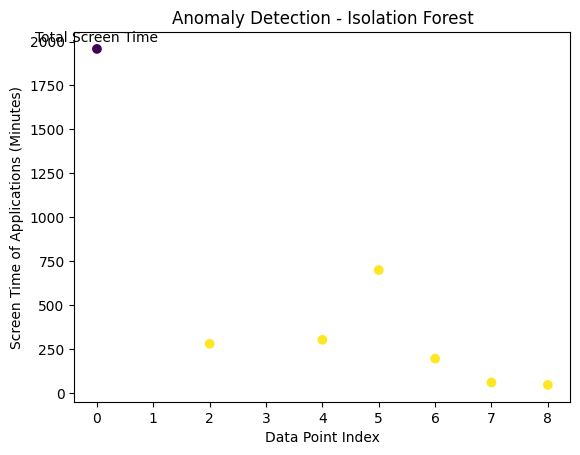

Detected Anomalies:
  Applications for Screen Time  Screen Time of Applications (Minutes)
0            Total Screen Time                                   1958


In [77]:
from sklearn.ensemble import IsolationForest

# Machine Learning

# Assuming df1_cleaned is the DataFrame with cleaned data
# Selecting relevant features for anomaly detection
features = ['Wake Up Counts of Applications', 'Notification Count for Applicaitons', 'Screen Time of Applications (Minutes)']
data_for_anomaly_detection = df1_cleaned[features]

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the data
model.fit(data_for_anomaly_detection)

# Predict anomalies (outliers)
anomaly_predictions = model.predict(data_for_anomaly_detection)

# Add anomaly predictions to the DataFrame
df1_cleaned['Anomaly'] = anomaly_predictions

# Visualize anomalies
plt.scatter(df1_cleaned.index, df1_cleaned['Screen Time of Applications (Minutes)'], c=df1_cleaned['Anomaly'], cmap='viridis')
plt.xlabel('Data Point Index')
plt.ylabel('Screen Time of Applications (Minutes)')
plt.title('Anomaly Detection - Isolation Forest')

# Annotate anomalies on the plot
anomalies = df1_cleaned[df1_cleaned['Anomaly'] == -1]
for i, anomaly in anomalies.iterrows():
    plt.annotate(anomaly['Applications for Screen Time'],
                 (i, anomaly['Screen Time of Applications (Minutes)']),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center')

plt.show()

# Display detected anomalies
print("Detected Anomalies:")
print(anomalies[['Applications for Screen Time', 'Screen Time of Applications (Minutes)']])

